
Since 1800, life expectancy around the globe has been steadily going up. You would expect the Gapminder data to confirm this.

The DataFrame g1800s has been pre-loaded. Your job in this exercise is to create a scatter plot with life expectancy in '1800'
on the x-axis and life expectancy in '1899' on the y-axis.

Here, the goal is to visually check the data for insights as well as errors. When looking at the plot, pay attention to whether
the scatter plot takes the form of a diagonal line, and which points fall below or above the diagonal line. This will inform how
life expectancy in 1899 changed (or did not change) compared to 1800 for different countries. If points fall on a diagonal line,
it means that life expectancy remained the same!


In [2]:
#read csv file
import pandas as pd
df = pd.read_csv("gapminder.csv")
print(df.head())


   S.no   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0     0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1     1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13   
2     2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3     3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4     4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

           ...            2008  2009  2010  2011  2012  2013  2014  2015  \
0          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4          ...             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2016        Life expectancy  
0   NaN               Abkhazia  
1   NaN            Afghanistan  

## Visualizing data

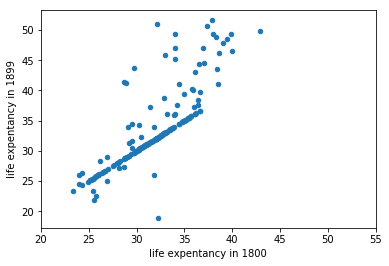

In [65]:
#import matplotlib.pyplot
import matplotlib.pyplot as plt 

#create the scatter plot 
df.plot(kind="scatter",x="1800",y="1899")

#specify axis labels
plt.xlabel("life expentancy in 1800")
plt.ylabel("life expentancy in 1899")

#specify axis limits 
plt.xlim(20,55)
plt.xlim(20,55)

#display the plot
plt.show()

In [64]:
#checking null values 

def check_null_or_valid(row_data):
    """Function that takes a row of data,
    Drops all missing values,
    and checks if all remaining
    values are greater than or equal to 0"""
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >=0
    return ge0

#check whether the first column is "life expectancy"
print(df.columns[-1] == "Life expectancy")

#check whether the values in the row are valid
print(df.iloc[:,1:].apply(check_null_or_valid, axis=1).all().all())

#check that there is only one instance of each country
print(df["Life expectancy"].value_counts()[-1]==1)
    

True
True
False


In [45]:
# deleting worng data using drop
df=df.drop(["S.no"], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 218 entries, 1800 to Life expectancy
dtypes: float64(217), object(1)
memory usage: 1.3+ MB


## reshapeing data
Now that you have all the data combined into a single DataFrame, the next step is to reshape it into a tidy data format.

Currently, the gapminder DataFrame has a separate column for each year. What you want instead is a single column that contains 
the year, and a single column that represents the average life expectancy for each year and country. By having year in its own 
column, you can use it as a predictor variable in a later analysis.

You can convert the DataFrame into the desired tidy format by melting it.



In [46]:
#melt of data
df_melt = pd.melt(df, id_vars="Life expectancy")

#rename the columns
df_melt.columns = ["country", "year", "life_expectancy"]

#print head 
print(df_melt.head())

                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


In [47]:
print(df_melt.tail())

            country  year  life_expectancy
169255   Yugoslavia  2016              NaN
169256       Zambia  2016            57.10
169257     Zimbabwe  2016            61.69
169258        Åland  2016              NaN
169259  South Sudan  2016            56.10


# Checking dataframe

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 218 entries, 1800 to Life expectancy
dtypes: float64(217), object(1)
memory usage: 1.3+ MB


In [49]:
# convert the year column to numeric 
df_melt.year= pd.to_numeric(df_melt.year)

# Looking at country Spellings

Having tidied your DataFrame and checked the data types, your next task in the data cleaning process is to look at the 'country'
column to see if there are any special or invalid characters you may need to deal with.

It is reasonable to assume that country names will contain:

The set of lower and upper case letters.
Whitespace between words.
Periods for any abbreviations.
To confirm that this is the case, you can leverage the power of regular expressions again. For common operations like this, 
Python has a built-in string method - str.contains() - which takes a regular expression pattern, and applies it to the Series, 
returning True if there is a match, and False otherwise.

Since here you want to find the values that do not match, you have to invert the boolean, which can be done using ~. 
This Boolean series can then be used to get the Series of countries that have invalid names.



In [50]:
#creating the series of countries 
countries = df_melt["country"]
countries

0                         Abkhazia
1                      Afghanistan
2            Akrotiri and Dhekelia
3                          Albania
4                          Algeria
5                   American Samoa
6                          Andorra
7                           Angola
8                         Anguilla
9              Antigua and Barbuda
10                       Argentina
11                         Armenia
12                           Aruba
13                       Australia
14                         Austria
15                      Azerbaijan
16                         Bahamas
17                         Bahrain
18                      Bangladesh
19                        Barbados
20                         Belarus
21                         Belgium
22                          Belize
23                           Benin
24                         Bermuda
25                          Bhutan
26                         Bolivia
27          Bosnia and Herzegovina
28                  

In [51]:
#drop all duplicaptes from countries
countries = countries.drop_duplicates()
countries

0                      Abkhazia
1                   Afghanistan
2         Akrotiri and Dhekelia
3                       Albania
4                       Algeria
5                American Samoa
6                       Andorra
7                        Angola
8                      Anguilla
9           Antigua and Barbuda
10                    Argentina
11                      Armenia
12                        Aruba
13                    Australia
14                      Austria
15                   Azerbaijan
16                      Bahamas
17                      Bahrain
18                   Bangladesh
19                     Barbados
20                      Belarus
21                      Belgium
22                       Belize
23                        Benin
24                      Bermuda
25                       Bhutan
26                      Bolivia
27       Bosnia and Herzegovina
28                     Botswana
29                       Brazil
                 ...           
230     

In [52]:
#regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

In [53]:
#create the boolean vector :mask
mask = countries.str.contains(pattern)
print(mask)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
230     True
231     True
232     True
233     True
234     True
235     True
236     True
237     True
238     True
239     True
240     True
241     True
242     True
243     True
244     True
245     True
246     True
247     True
248     True
249     True
250     True
251    False
252    False
253    False
254     True
255     True
256     True
257     True
258    False
259     True
Name: country, Length: 260, dtype: bool


In [54]:
#invert the mark : mask_inverse
mask_inverse = ~mask
print(mask_inverse)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
230    False
231    False
232    False
233    False
234    False
235    False
236    False
237    False
238    False
239    False
240    False
241    False
242    False
243    False
244    False
245    False
246    False
247    False
248    False
249    False
250    False
251     True
252     True
253     True
254    False
255    False
256    False
257    False
258     True
259    False
Name: country, Length: 260, dtype: bool


In [35]:
#subset countries using mask_inverse :invalid countries
invalid_countries = countries.loc[mask_inverse]

In [36]:
print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


# More data cleaning and processing


It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as imputation), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. See pandas Foundations for more on forward fill and backward fill.

In general, it is not the best idea to drop missing values, because in doing so you may end up throwing away useful information. In this data, the missing values refer to years where no estimate for life expectancy is available for a given country. You 
could fill in, or guess what these life expectancies could be by looking at the average life expectancies for other countries in that year, for example. Whichever strategy you go with, it is important to carefully consider all options and understand how they will affect your data.

In this exercise, you'll practice dropping missing values. Your job is to drop all the rows that have NaN in the life_expectancy column. Before doing so, it would be valuable to use assert statements to confirm that year and country do not have any missing values.

Begin by printing the shape of gapminder in the IPython Shell prior to dropping the missing values. Complete the exercise to find out what its shape will be after dropping the missing values!

In [56]:
print(pd.notnull(df_melt.country).all())

True


In [58]:
print(pd.notnull(df_melt.year).all())

True


In [59]:
print(pd.notnull(df_melt.life_expectancy).all)

<bound method Series.all of 0         False
1          True
2         False
3          True
4          True
5         False
6         False
7          True
8         False
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24        False
25         True
26         True
27         True
28         True
29         True
          ...  
169230     True
169231     True
169232     True
169233     True
169234    False
169235    False
169236     True
169237     True
169238     True
169239     True
169240     True
169241     True
169242    False
169243     True
169244    False
169245     True
169246     True
169247     True
169248    False
169249     True
169250     True
169251     True
169252    False
169253    False
169254     True
169255    False
169256     True
169257     True
169258    False
169259     T

In [62]:
#drop missing values
df_melt = df_melt.dropna(how = "any")
df_melt

,country,year,life_expectancy
1,Afghanistan,1800,28.21
3,Albania,1800,35.40
4,Algeria,1800,28.82
7,Angola,1800,26.98
9,Antigua and Barbuda,1800,33.54
10,Argentina,1800,33.20
11,Armenia,1800,34.00
12,Aruba,1800,34.42
13,Australia,1800,34.05
14,Austria,1800,34.40


# Wrapping up


 Now that youhave a clean and tidy dataset, you can do a bit of visualization and aggregation. In this exercise,
you'll begin by creating a histogram of the life_expectancy column. You should not get any values under 0 and you should 
see something reasonable on the higher end of the life_expectancy age range.

Your next task is to investigate how average life expectancy changed over the years. To do this, you need to subset the data
by each year, get the life_expectancy column from each subset, and take an average of the values. You can achieve this using 
the .groupby() method. This .groupby() method is covered in greater depth in Manipulating DataFrames with pandas.

Finally, you can save your tidy and summarized DataFrame to a file using the .to_csv() method.

Matplotlib and pandas have been pre-imported as plt and pd. Go for it!



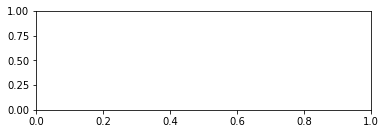

In [66]:
#Add first subplot
plt.subplot(2,1,1)

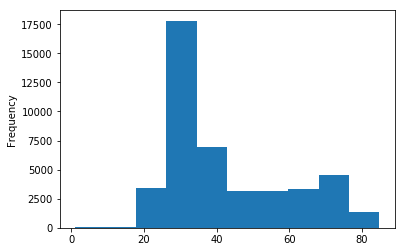

In [67]:
#histogram of life_expectancy
df_melt.life_expectancy.plot(kind="hist")

In [68]:
#group 
df_melt_agg = df_melt.groupby("year")["life_expectancy"].mean()

In [69]:
print(df_melt_agg.head())

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64


In [70]:
print(df_melt_agg.tail())

year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


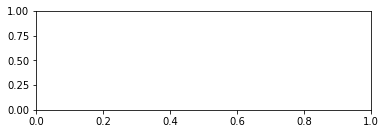

In [71]:
#second subplot
plt.subplot(2,1,2)

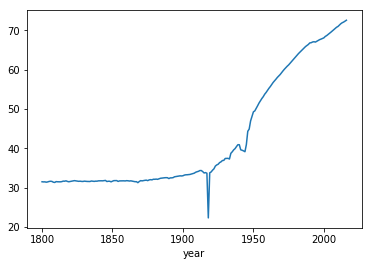

In [72]:
df_melt_agg.plot()

Text(0.5,0,'year')

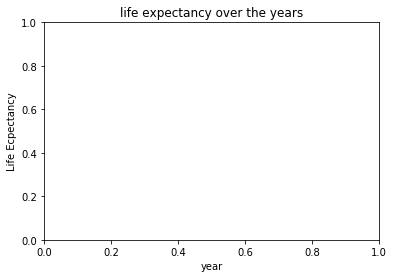

In [73]:
plt.title("life expectancy over the years")
plt.ylabel("Life Ecpectancy")
plt.xlabel("year")

In [75]:
plt.tight_layout()
plt.show()

In [76]:
#save both dataframe to csv files
df_melt.to_csv("gapminder_melt.csv")
df_melt_agg.to_csv("gapminder_agg.csv")